In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


- **pandas** – Handles and manipulates tabular data.  
- **numpy** – Performs numerical operations.  
- **matplotlib.pyplot** – Visualizes data.  
- **train_test_split** – Splits data into training and testing sets.  
- **MinMaxScaler** – Normalizes features to a 0-1 range.  
- **KNeighborsRegressor** – Implements KNN regression for prediction.  
- **mean_absolute_error, mean_squared_error** – Evaluates model performance.  


In [7]:
df = pd.read_csv("Amazon stock data 2000-2025.csv")


- **pd.read_csv("Amazon stock data 2000-2025.csv")** – Reads the CSV file into a Pandas DataFrame.  
- **df =**  Stores the loaded data in the variable df.  
- **Purpose:** This loads the stock dataset into memory for further processing.  


In [13]:
df['date'] = pd.to_datetime(df['date'], utc=True)

features = ['open', 'high', 'low', 'volume']
target = 'adj_close'

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42, shuffle=False)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")




Mean Absolute Error: 48.96179820426368
Mean Squared Error: 3427.196385421896


- Converts the 'date' column to datetime format with UTC timezone.  
- Defines input features (open, high, low, volume) and the target (adj_close).  
- Applies MinMax scaling to normalize feature values between 0 and 1.  
- Splits data into training (80%) and testing (20%) sets while preserving order.  
- Initializes a KNN regressor with 5 neighbors and trains it on the training data.  
- Predicts stock prices on the test set using the trained model.  
- Calculates and prints Mean Absolute Error (MAE) and Mean Squared Error (MSE) to evaluate prediction accuracy.  


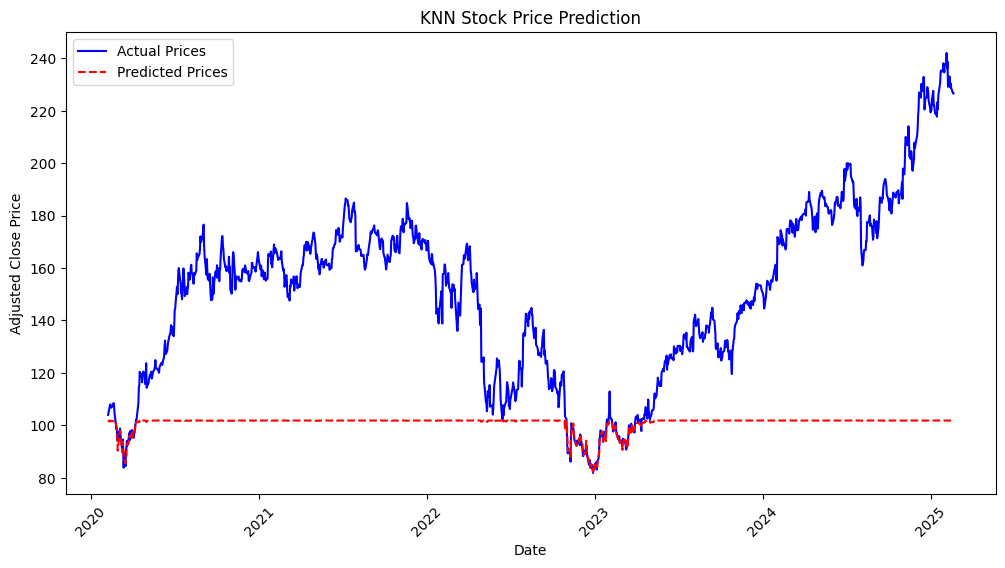

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'].iloc[len(y_train):], y_test.values, label='Actual Prices', color='blue')
plt.plot(df['date'].iloc[len(y_train):], y_pred, label='Predicted Prices', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('KNN Stock Price Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.show()